In [1]:
# Importing dependency
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Data path, creating the model object and the name
data_path = '../../../input/Santos_Basin/Santos_Basin_88ma_seismic/v7/'
geo_model = gp.create_model('Santos_Basin_88ma')

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Extension of the model, resolution of the model and the paths of surface and orientation
gp.init_data(geo_model,
             extent=[0, 4000, 0, 20000, -13000, 0],
             resolution=[50, 50, 50],
             path_i=data_path + "surfaces_points_3.csv",
             path_o=data_path + "orientations_points_3.csv",
             default_values=True)

Active grids: ['regular']


Santos_Basin_88ma  2023-06-01 13:56

In [3]:
# The surfaces of the model
gp.get_data(geo_model, 'surfaces')

,surface,series,order_surfaces,color,id
0,CAMBURI_SUP,Default series,1,#015482,1
1,CAMBURI_INF,Default series,2,#9f0052,2
2,ARIRI,Default series,3,#ffbe00,3
3,BV_SUP,Default series,4,#728f02,4
4,BV_INF,Default series,5,#443988,5
5,ITAPEMA,Default series,6,#ff3f20,6
6,CAMBORIU,Default series,7,#5DA629,7
7,basement,Basement,1,#4878d0,8


In [5]:
gp.map_stack_to_surfaces(geo_model,
                         {"Strat_series_1": ('CAMBURI_SUP', 'CAMBURI_INF'),
                          "unconformity": ('ARIRI'),
                          "Strat_series_2": ('BV_SUP',
                                             'BV_INF',
                                             'ITAPEMA', 
                                             'CAMBORIU',
                                             )},
                                             remove_unused_series=True)

,surface,series,order_surfaces,color,id
0,CAMBURI_SUP,Strat_series_1,1,#015482,1
1,CAMBURI_INF,Strat_series_1,2,#9f0052,2
2,ARIRI,unconformity,1,#ffbe00,3
3,BV_SUP,Strat_series_2,1,#728f02,4
4,BV_INF,Strat_series_2,2,#443988,5
5,ITAPEMA,Strat_series_2,3,#ff3f20,6
6,CAMBORIU,Strat_series_2,4,#5DA629,7
7,basement,Basement,1,#4878d0,8


In [ ]:
gp.map_stack_to_surfaces(geo_model,
                         {"unconformity": ('TOP_ARIRI', 'BOT_ARIRI'),
                          "Strat_series_1": ('TOP_CAMBURI_INF', 'BOT_CAMBURI_INF',
                                             'TOP_CAMBURI_SUP', 'BOT_CAMBURI_SUP'),
                          "Strat_series_2": ('TOP_BV_SUP', 'BOT_BV_SUP',
                                             'TOP_BV_INF', 'BOT_BV_INF',
                                             'TOP_ITAPEMA', 'BOT_ITAPEMA',
                                             'TOP_CAMBORIU', 'BOT_CAMBORIU',
                                             )},
                                             remove_unused_series=True)

In [ ]:
geo_model.surfaces

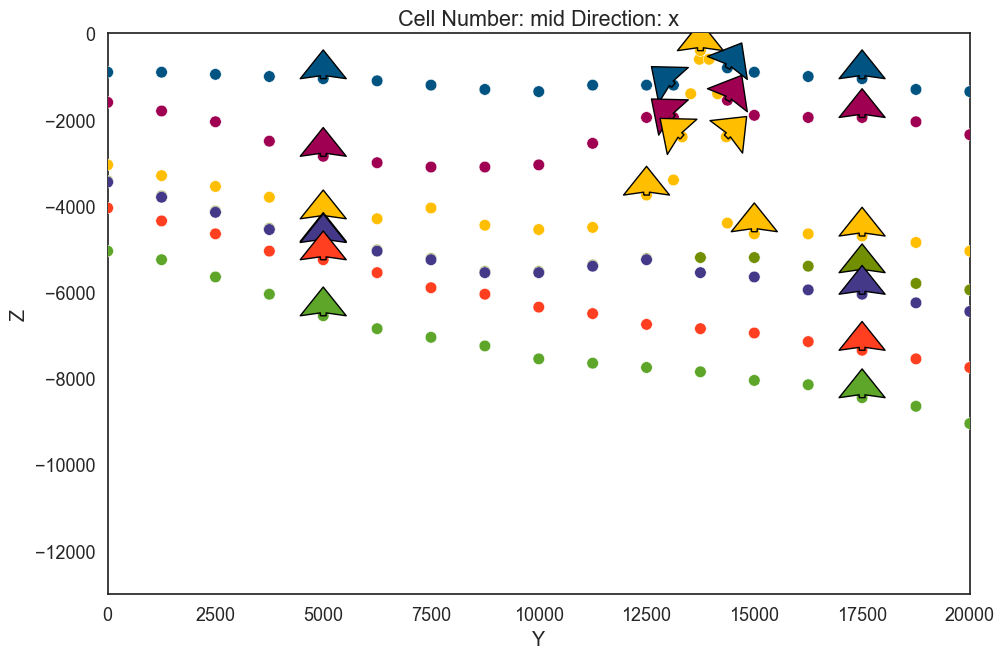

In [6]:
# Plot 2D of the data in X, Y and Z direction
gp.plot_2d(geo_model, direction=['x'], show_data=True, show_boundaries=True, legend=False, show=True)

#gp.plot_2d(geo_model, direction=['y'], show_data=True, show_boundaries=True, legend=False, show=True)

#gp.plot_2d(geo_model, direction=['z'], show_data=True)

In [ ]:
# Plot in 3D
gpv = gp.plot_3d(geo_model, plotter_type='basic', image=False, show_data=True, show_surfaces=True, show_scalar=True, show_boundaries=True)

In [7]:
%%time
# interpolating
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_run',
                    dtype="float64",
                    verbose=[]
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                           values
range               24186.773245
$C_o$            13928571.428571
drift equations     [3, 3, 3, 3]
Wall time: 17.8 s


In [ ]:
%%time
# Interpolating
gp.set_interpolator(geo_model,
                    theano_optimizer='fast_run',
                    compile_theano=True
                    )

In [8]:
%%time
# Computing a solution for the model
sol = gp.compute_model(geo_model, compute_mesh=True)

Wall time: 3.56 s


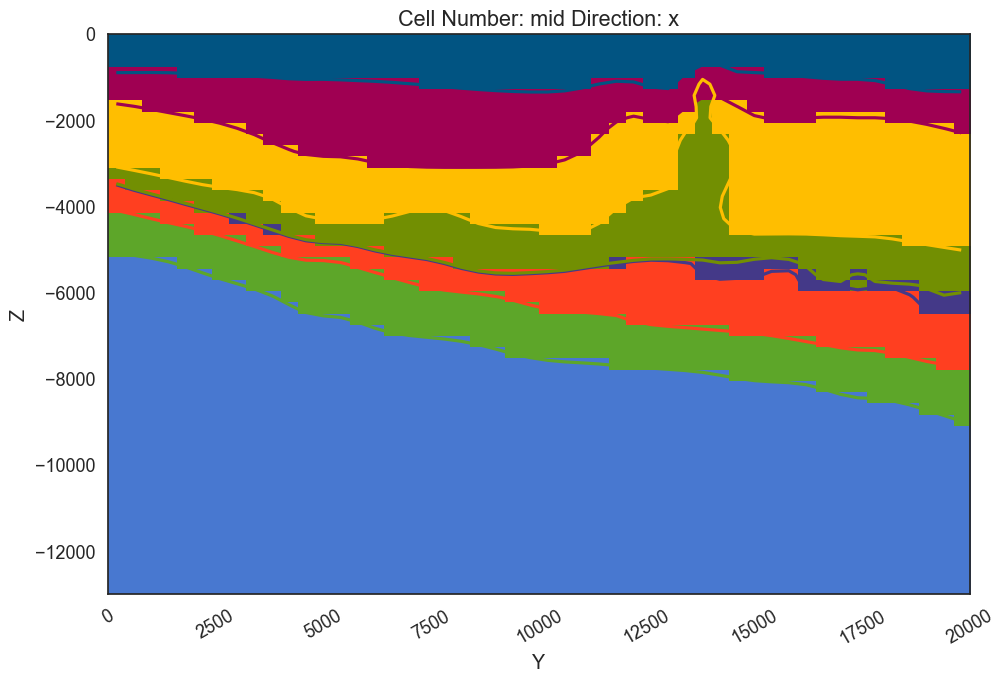

In [9]:
# Plot 2D of Y and X
#gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True, legend=False)

In [ ]:
# Plot 3D
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=False, show_results=True, show_lith=True, show_boundaries=True)

In [ ]:
# Saving the model in a .zip file
'''
This code saves the model in a .zip file in 
the same folder that the .ipynb file is located
'''

#gp.save_model(geo_model, compress=True)